In [116]:
import pandas as pd 
import numpy as np 

In [117]:
# Reading data files
df_x = pd.read_csv("uWaveGestureLibrary_X_TRAIN", delim_whitespace = True, header = None)
df_y = pd.read_csv("uWaveGestureLibrary_Y_TRAIN", delim_whitespace = True, header = None)
df_z = pd.read_csv("uWaveGestureLibrary_Z_TRAIN", delim_whitespace = True, header = None)
classes = df_x[0]

In [118]:
# Transforming 3 different dataframes to one dataframe (Long Format)
df = pd.DataFrame(columns = ['time series id','time index','x','y','z','class'] ) 
temp_df=df

for i in range(0,len(df_x)):
    temp_df['x']=df_x.iloc[i,1:]
    temp_df['y']=df_y.iloc[i,1:]
    temp_df['z']=df_z.iloc[i,1:]
    temp_df['time index'] = range(1,316)
    temp_df['time series id'] = i+1
    temp_df['class'] = df_x.iloc[i,0]
    df=pd.concat([df, temp_df], axis=0, sort=False)

df=df.iloc[315:,:]
df

,time series id,time index,x,y,z,class
1,1,1,-0.304243,-2.119396,-1.528965,6.0
2,1,2,-0.304243,-2.119396,-1.528965,6.0
3,1,3,-0.304243,-2.119396,-1.528965,6.0
4,1,4,-0.304243,-2.119396,-1.528965,6.0
5,1,5,-0.304243,-2.119396,-1.528965,6.0
...,...,...,...,...,...,...
311,896,311,1.968575,-0.886777,-0.848602,5.0
312,896,312,2.028532,-0.820651,-0.828104,5.0
313,896,313,1.987267,-0.754525,-0.800426,5.0
314,896,314,1.887578,-0.688399,-0.768603,5.0


In [119]:
# If we do cumulative sum for 2 times on seperate X,Y,Z dataframes, we can transform acceleration data to position data. 
df_x.drop(labels = [0], axis = "columns", inplace = True)
df_y.drop(labels = [0], axis = "columns", inplace = True)
df_z.drop(labels = [0], axis = "columns", inplace = True)
df_xx = df_x.cumsum(axis=1)
df_yy = df_y.cumsum(axis=1)
df_zz = df_z.cumsum(axis=1)
pos_x = df_xx.cumsum(axis=1)
pos_y = df_yy.cumsum(axis=1)
pos_z = df_zz.cumsum(axis=1)

In [120]:
# Function for plotting gestures
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def dscatter(x,y,z):    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(x, y, z, color = "green")
    plt.title("3D scatter plot")
    return None

In [121]:
# In this step, I found indexes for different gestures in "samples" list 
classes = list(classes)
samples = []
for i in range(1,9):
    samples.append(classes.index(i))

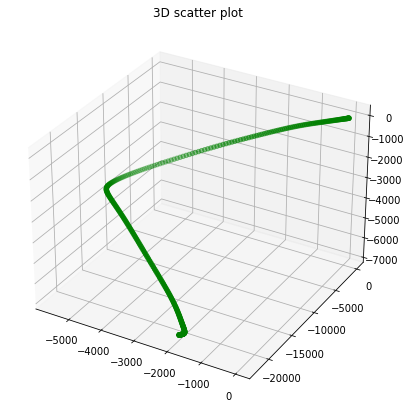

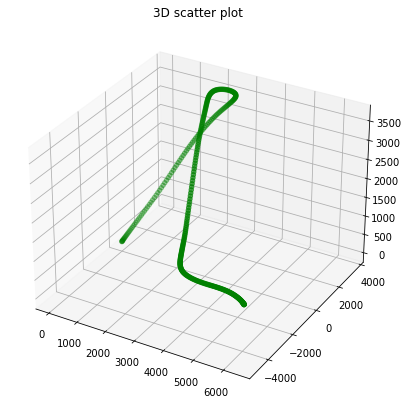

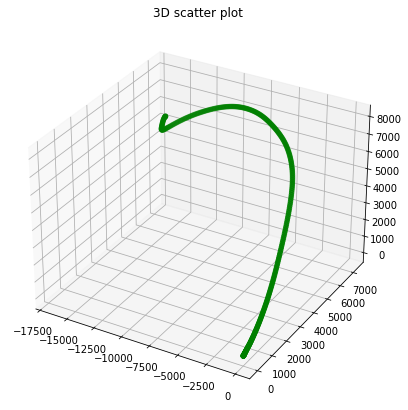

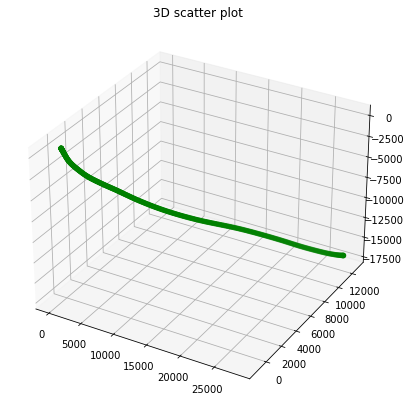

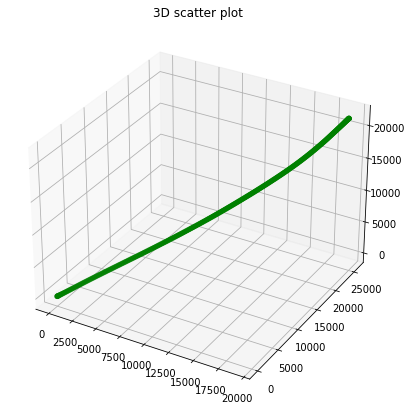

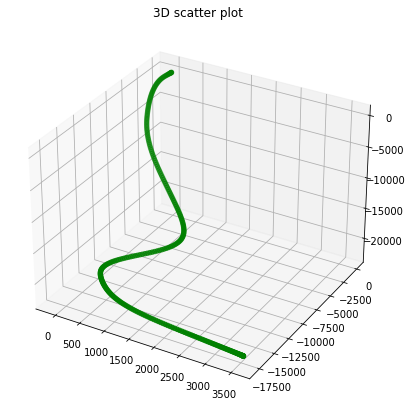

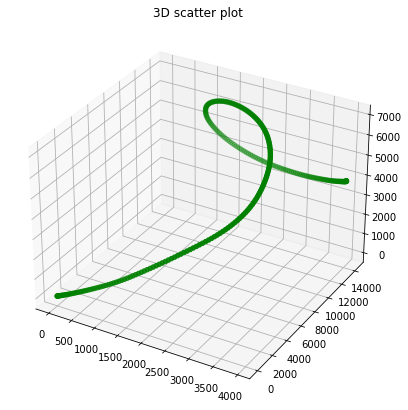

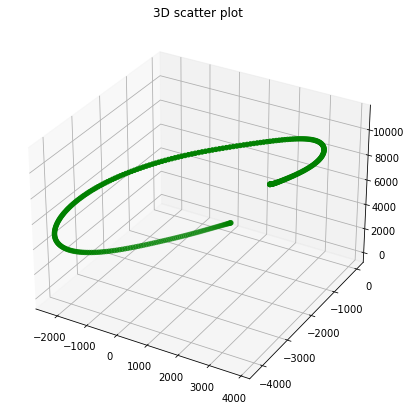

In [122]:
for i in samples:
    dscatter(pos_x.iloc[i],pos_y.iloc[i], pos_z.iloc[i])

# Task B

In [123]:
from sklearn.decomposition import PCA

In [124]:
pca = PCA(n_components=1)
k = pca.fit_transform(df[["x","y","z"]])

In [125]:
df["PCA1D"] = k

In [126]:
print(pca.explained_variance_ratio_, pca.explained_variance_)

[0.49059498] [1.46711782]


In [127]:
df.head()

,time series id,time index,x,y,z,class,PCA1D
1,1,1,-0.304243,-2.119396,-1.528965,6.0,-2.492575
2,1,2,-0.304243,-2.119396,-1.528965,6.0,-2.492575
3,1,3,-0.304243,-2.119396,-1.528965,6.0,-2.492575
4,1,4,-0.304243,-2.119396,-1.528965,6.0,-2.492575
5,1,5,-0.304243,-2.119396,-1.528965,6.0,-2.492575


## Task B

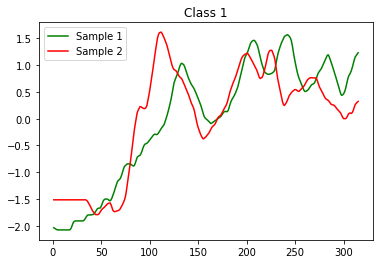

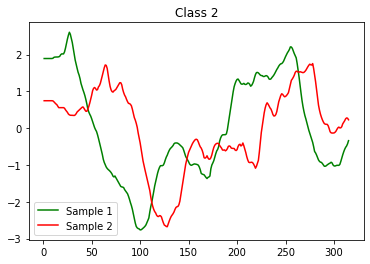

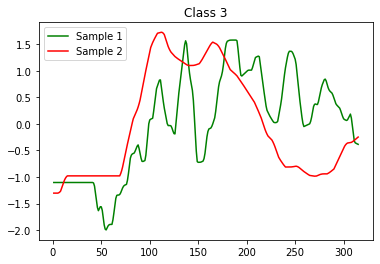

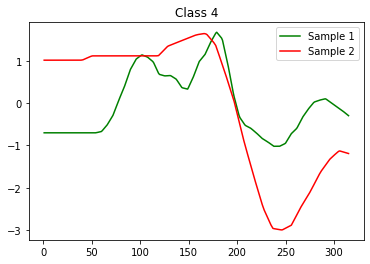

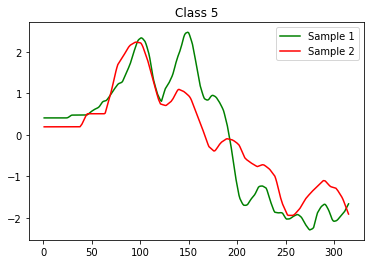

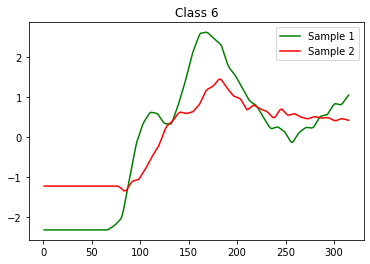

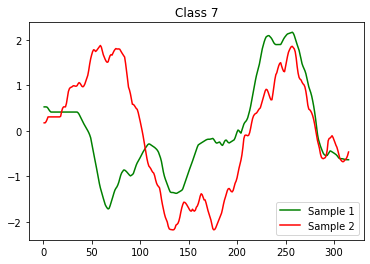

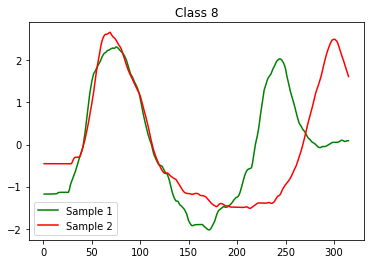

In [128]:
# For each class gestures plotting PCA data
for i in range(1,9):
    same_observ=df.loc[df.iloc[:,5]==i]
    samples=same_observ['time series id'].sample(n=2).to_frame()
    rslt_df1 = df[df['time series id'] == samples.iloc[0,0]]
    rslt_df2 = df[df['time series id'] == samples.iloc[1,0]]
    plt.plot(temp_df['time index'], rslt_df1.iloc[:,6], color = "g")
    plt.plot(temp_df['time index'], rslt_df2.iloc[:,6], color = "r")
    plt.legend(["Sample 1", "Sample 2"])
    plt.title('Class %s' %i)
    plt.show()

## Task C

In [138]:
# Applying PCA on seperate class gesture data
def pca_class(x):
    temp_df = df[df["class"] == x]
    pca = PCA(n_components = 1)
    temp_df["PCA"] = pca.fit_transform(temp_df[["x","y","z"]])
    ratio = pca.explained_variance_ratio_
    variance = pca.explained_variance_
    print("Class", x)
    print("Explained Ratio: ", pca.explained_variance_ratio_)
    return temp_df, ratio, variance    

In [139]:
def visual_pca(x):
    sample = x.iloc[1]["time series id"]
    temp_df = x[x["time series id"] == sample]
    sample = x.iloc[-1]["time series id"]
    temp2_df = x[x["time series id"] == sample]
    fig=plt.plot()
    plt.plot(temp_df["time index"],temp_df["PCA"], color = "g")
    plt.xlabel("Time Index")
    plt.ylabel("PCA ")
    plt.plot(temp2_df["time index"],temp2_df["PCA"], color = "b")
    plt.show()

Class 1
Explained Ratio:  [0.46253306]


C:\Users\Muhammed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


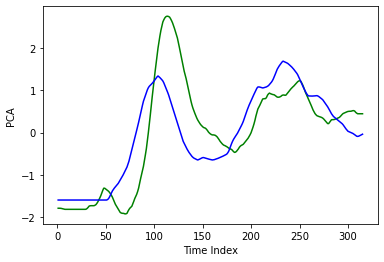

C:\Users\Muhammed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Class 2
Explained Ratio:  [0.51254787]


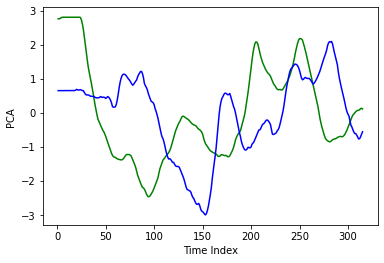

Class 3
Explained Ratio:  [0.54074403]


C:\Users\Muhammed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


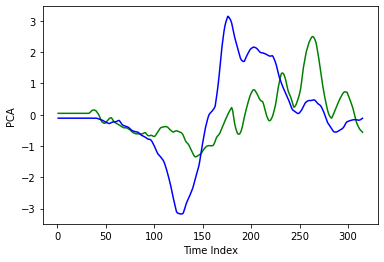

C:\Users\Muhammed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Class 4
Explained Ratio:  [0.55012869]


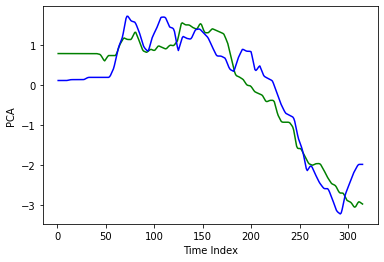

Class 5
Explained Ratio:  [0.6472234]


C:\Users\Muhammed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


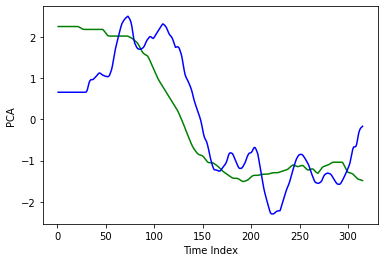

Class 6
Explained Ratio:  [0.57182387]


C:\Users\Muhammed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


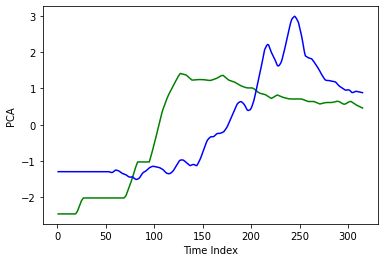

C:\Users\Muhammed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Class 7
Explained Ratio:  [0.5192033]


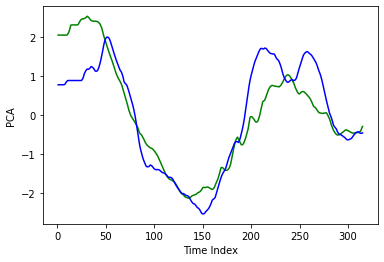

C:\Users\Muhammed\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Class 8
Explained Ratio:  [0.61342685]


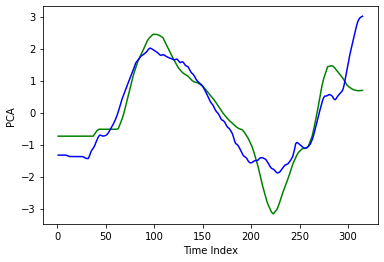

In [140]:
ratios = []
variances = []
for i in range(1,9):
    x = pca_class(i)
    ratios.append(x[1][0])
    variances.append(x[2][0])
    visual_pca(x[0])

In [144]:
#Seperate class variance ratios
ratios

[0.46253306377449493,
 0.5125478684358777,
 0.5407440268424966,
 0.5501286940958744,
 0.6472233987301407,
 0.5718238705516253,
 0.5192032956757135,
 0.6134268508371536]

In [145]:
#Seperate class variances
variances

[1.3832301076951545,
 1.5328072535395088,
 1.61713056808745,
 1.645194240596636,
 1.9355545479300742,
 1.7100745785658005,
 1.5527091039920058,
 1.8344966303312504]

In [143]:
# All data variance and variance ratio
print(pca.explained_variance_ratio_, pca.explained_variance_)

[0.49059498] [1.46711782]


## Task D

In [80]:
from sklearn.metrics import euclidean_distances
from sklearn.manifold import MDS

In [95]:
x = euclidean_distances(df_x, df_x)
y = euclidean_distances(df_y, df_y)
z = euclidean_distances(df_z, df_z)
distance_matrix = pd.DataFrame(x+y+z)

In [146]:
distance_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,886,887,888,889,890,891,892,893,894,895
0,0.000002,8.768508e+01,7.949081e+01,86.407000,7.003667e+01,82.726427,84.605986,57.853864,65.084971,48.365078,...,79.660044,68.612071,71.047374,62.164942,90.623621,58.456040,68.997596,73.810654,81.064041,90.190673
1,87.685079,4.768372e-07,4.496116e+01,63.116745,5.475039e+01,63.150540,65.146619,86.151956,60.939958,99.707550,...,79.078956,84.347136,55.626115,83.347607,47.370852,76.897658,94.646271,70.736891,73.146395,37.503138
2,79.490815,4.496116e+01,3.371748e-07,74.071904,5.152769e+01,60.076187,91.552591,76.051910,60.333320,93.180185,...,86.075215,72.683598,54.984918,82.526313,55.797566,61.405177,86.213275,82.129885,91.198174,38.758188
3,86.407000,6.311674e+01,7.407190e+01,0.000001,7.631456e+01,66.352272,67.562412,96.094497,85.504458,75.283066,...,70.556800,63.756430,79.889715,76.075716,57.683123,75.028488,77.329809,63.172388,63.864824,64.885296
4,70.036673,5.475039e+01,5.152769e+01,76.314556,9.536743e-07,63.144161,77.183649,58.137359,32.399846,82.327986,...,81.699278,93.182722,26.864291,61.493925,83.147321,74.660572,76.686200,77.826520,75.661318,67.133220


In [148]:
mds = MDS(2, dissimilarity='precomputed', n_jobs = -1)
outputs = mds.fit_transform(distance_matrix)
output_data = pd.DataFrame(outputs,columns=["x","y"])
output_data["class"] = classes
output_data.head()

,x,y,class
0,57.308807,5.945301,6.0
1,-42.004017,37.479621,5.0
2,-13.114209,56.728107,5.0
3,-55.167948,-12.834340,3.0
4,7.598258,39.790326,4.0


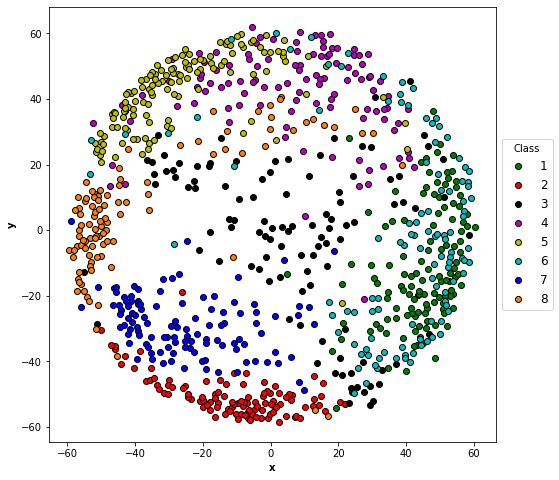

In [151]:
colors = ["g","r","k","m","y","c","b","tab:orange"]
fig = plt.figure(figsize=(8, 8))
for c in range(1,9):
    plt.scatter(output_data[output_data["class"] == c]["x"], output_data[output_data["class"] == c]["y"], marker='o',c=colors[c-1],
                edgecolors="black",label=str(c))
plt.xlabel("x",fontweight ='bold')
plt.ylabel("y",fontweight ='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12,title="Class")

plt.show()

## Comment
Class 2,7,5 and 8 can be seperated from other classes. Although, multi dimensional scaling seems like to be succesful for this multi class classification, I think it is not enough for this purpose. There are lots of overlaps between classes. 
